<a href="https://colab.research.google.com/github/mixhub10/dl16/blob/main/project/dl16_proj02_XOR_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XOR problem
## numpy with back propagation
## MLP
- 1-hidden layer
- 2 hidden-layers
- hyperparameter setting

In [ ]:
# numpy - bak propagation with iterations=20000
import numpy as np
# XOR solution by MLP

# 시그모이드 함수
def actf(x):
	return 1/(1+np.exp(-x))

# 시그모이드 함수의 미분치
def actf_deriv(x):
	    return x*(1-x)

# 입력유닛의 개수, 은닉유닛의 개수, 출력유닛의 개수
inputs, hiddens, outputs = 2, 2, 1
learning_rate = 0.5

# 훈련 입력과 출력
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # (4,2)
T = np.array([[0], [1], [1], [0]])              # (4,1)

# 가중치를 –1.0에서 1.0 사이의 난수로 초기화한다.
W1 = 2*np.random.random((inputs, hiddens))-1    # (2,2)
W2 = 2*np.random.random((hiddens, outputs))-1   # (2,1)
B1 = np.zeros(hiddens)                          # (2,)
B2 = np.zeros(outputs)                          # (1,)
print(W1.shape,W2.shape,B1.shape,B2.shape)

# 순방향 전파 계산
def predict(x):
        layer0 = x			# 입력을 layer0에 대입한다. 
        Z1 = np.dot(layer0, W1)+B1	# 행렬의 곱을 계산한다. 
        layer1 = actf(Z1)		# 활성화 함수를 적용한다. 
        Z2 = np.dot(layer1, W2)+B2	# 행렬의 곱을 계산한다. 
        layer2 = actf(Z2)		# 활성화 함수를 적용한다. 
        return layer0, layer1, layer2
    
# 역방향 전파 계산
def fit():
    global W1, W2, B1, B2
    for i in range(20000):
            layer0, layer1, layer2 = predict(X) # input-batch-size = 4
            layer2_error = layer2-T
            # print(layer0.shape,layer1.shape,layer2.shape)
            
            layer2_delta = layer2_error*actf_deriv(layer2)
            layer1_error = np.dot(layer2_delta, W2.T)
            layer1_delta = layer1_error*actf_deriv(layer1)
            # print(layer2_error.shape)
            # print(layer2_delta.shape)
            # print(layer1_error.shape)
            # print(layer1_delta.shape)
            
            W2 += -learning_rate*np.dot(layer1.T, layer2_delta)/4.0  # 4개의 입력에 대한 평균 기울기
            W1 += -learning_rate*np.dot(layer0.T, layer1_delta)/4.0
            B2 += -learning_rate*np.sum(layer2_delta, axis=0)/4.0
            B1 += -learning_rate*np.sum(layer1_delta, axis=0)/4.0

def test():
    for x, y in zip(X, T):
        x = np.reshape(x, (1, -1))		# 하나여도 2차원 형태이어야 한다.
        layer0, layer1, layer2 = predict(x)
        print(x, y, layer2)

fit()
test()

(2, 2) (2, 1) (2,) (1,)
[[0 0]] [0] [[0.02312177]]
[[0 1]] [1] [[0.97533927]]
[[1 0]] [1] [[0.97528743]]
[[1 1]] [0] [[0.03066929]]


> ### Dose numpy with back propagation solve XOR problem?

In [ ]:
# Keras MLP with 1 hidden layer, epochs=2000
import numpy as np
import tensorflow as tf

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units=2, input_shape=(2,), activation='sigmoid')) #
model.add(tf.keras.layers.Dense(units=1,  activation='sigmoid')) #
model.compile(loss='mean_squared_error', 
              optimizer=tf.keras.optimizers.SGD(lr=0.1)) 

model.summary()
 
X = np.array([[0, 0],[0, 1],[1, 0],[1, 1]])
y = np.array([[0], [1], [1], [0]])

model.fit(X, y, batch_size=1, epochs=2000, verbose=2)

print(model.predict(X))



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 6         
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
4/4 - 0s - loss: 0.2561 - 307ms/epoch - 77ms/step
Epoch 2/2000
4/4 - 0s - loss: 0.2560 - 12ms/epoch - 3ms/step
Epoch 3/2000
4/4 - 0s - loss: 0.2560 - 10ms/epoch - 3ms/step
Epoch 4/2000
4/4 - 0s - loss: 0.2560 - 10ms/epoch - 3ms/step
Epoch 5/2000
4/4 - 0s - loss: 0.2559 - 10ms/epoch - 2ms/step
Epoch 6/2000
4/4 - 0s - loss: 0.2559 - 11ms/epoch - 3ms/step
Epoch 7/2000
4/4 - 0s - loss: 0.2558 - 10ms/epoch - 2ms/step
Epoch 8/2000
4/4 - 0s - los

> ### Not good result

In [ ]:
# # Keras MLP with 2 hidden layers and epochs=2000
import numpy as np
import tensorflow as tf

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units=16, input_shape=(2,), activation='relu')) #①
model.add(tf.keras.layers.Dense(units=8, activation='relu')) #
model.add(tf.keras.layers.Dense(units=1,  activation='sigmoid')) #		
model.compile(loss='mean_squared_error', 
              optimizer=tf.keras.optimizers.SGD(lr=0.1)) 

model.summary()

X = np.array([[0, 0],[0, 1],[1, 0],[1, 1]])
y = np.array([[0], [1], [1], [0]])

model.fit(X, y, batch_size=1, epochs=2000, verbose=2)

print(model.predict(X))



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                48        
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                                 
 dense_6 (Dense)             (None, 1)                 9         
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
4/4 - 0s - loss: 0.2444 - 382ms/epoch - 95ms/step
Epoch 2/2000
4/4 - 0s - loss: 0.2437 - 16ms/epoch - 4ms/step
Epoch 3/2000
4/4 - 0s - loss: 0.2428 - 15ms/epoch - 4ms/step
Epoch 4/2000
4/4 - 0s - loss: 0.2418 - 10ms/epoch - 3ms/step
Epoch 5/2000
4/4 - 0s - loss: 0.2409 - 9ms/epoch - 2ms/step
Epoch 6/2000
4

---
---

## [DIY] Hyperparameter control
- Find the optimal training condition with epoches=2000

> ## Try Bard, ChatGPT, Bing AI
- ### Write a MLP code to solve XOR using Keras.

---

## Hyperparameter

- learning_rate
- batch_size 
- epochs 

In [25]:
import tensorflow as tf

# 입력 데이터와 출력 데이터를 정의합니다.
x_train = [[0, 0], [0, 1], [1, 0], [1, 1]]
y_train = [[0], [1], [1], [0]]

# MLP 모델을 정의합니다.
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 하이퍼 파라미터를 설정합니다.
learning_rate = 0.01
batch_size = 1
epochs = 500


In [26]:

# 모델을 컴파일합니다.
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'])


In [27]:

# 모델을 학습시킵니다.
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=2)


Epoch 1/500
4/4 - 1s - loss: 0.7517 - accuracy: 0.2500 - 744ms/epoch - 186ms/step
Epoch 2/500
4/4 - 0s - loss: 0.7040 - accuracy: 0.2500 - 13ms/epoch - 3ms/step
Epoch 3/500
4/4 - 0s - loss: 0.6938 - accuracy: 0.2500 - 15ms/epoch - 4ms/step
Epoch 4/500
4/4 - 0s - loss: 0.6894 - accuracy: 0.5000 - 22ms/epoch - 5ms/step
Epoch 5/500
4/4 - 0s - loss: 0.6896 - accuracy: 0.5000 - 13ms/epoch - 3ms/step
Epoch 6/500
4/4 - 0s - loss: 0.6890 - accuracy: 0.5000 - 12ms/epoch - 3ms/step
Epoch 7/500
4/4 - 0s - loss: 0.6885 - accuracy: 0.5000 - 13ms/epoch - 3ms/step
Epoch 8/500
4/4 - 0s - loss: 0.6878 - accuracy: 0.5000 - 12ms/epoch - 3ms/step
Epoch 9/500
4/4 - 0s - loss: 0.6879 - accuracy: 0.5000 - 14ms/epoch - 3ms/step
Epoch 10/500
4/4 - 0s - loss: 0.6870 - accuracy: 0.5000 - 13ms/epoch - 3ms/step
Epoch 11/500
4/4 - 0s - loss: 0.6866 - accuracy: 0.5000 - 13ms/epoch - 3ms/step
Epoch 12/500
4/4 - 0s - loss: 0.6868 - accuracy: 0.7500 - 15ms/epoch - 4ms/step
Epoch 13/500
4/4 - 0s - loss: 0.6852 - accurac

In [28]:

# 모델을 사용하여 XOR 문제를 풀고 결과를 출력합니다.
y_pred = model.predict(x_train)
print(y_pred)

1/1 [==============================] - 0s 111ms/step
[[2.1624742e-03]
 [9.6438402e-01]
 [9.6438402e-01]
 [6.1836711e-04]]


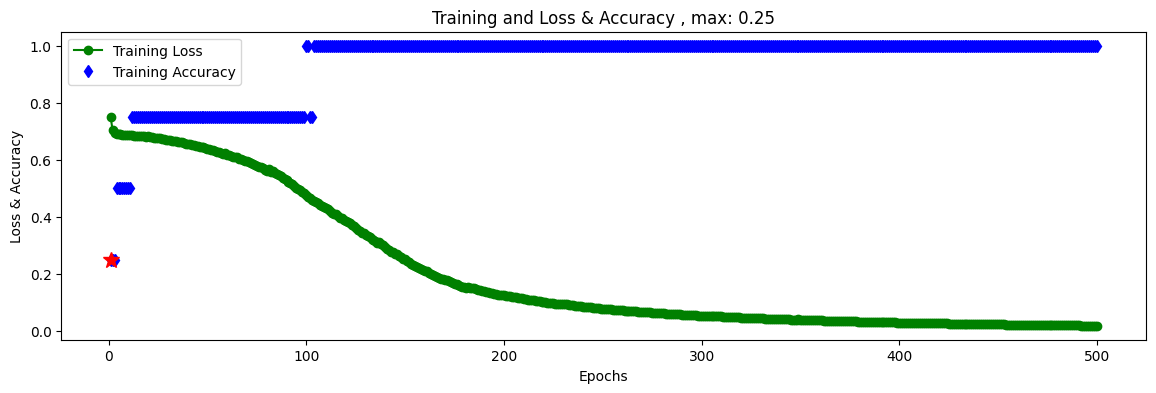

In [29]:
# Training graph
import numpy as np
import matplotlib.pylab as plt
history_dict = history.history 
loss = history_dict['loss']
accuracy = history_dict['accuracy']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,1,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, accuracy, 'bd', label='Training Accuracy')
plt.plot(np.argmin(np.array(accuracy))+1,accuracy[np.argmin(np.array(accuracy))], 'r*', ms=12)
plt.title('Training and Loss & Accuracy , max: ' + str(np.round(accuracy[np.argmin(np.array(accuracy))],2)))
plt.xlabel('Epochs')
plt.ylabel('Loss & Accuracy')
plt.legend()